In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
#1) Initialize parameters.
tmax = 50 # s
dt = 0.001 # s

#1.1) Neuron/Network pairs.
c_m = 1e-6 # F/cm^2
v_th = -55 # mV
v_r = -75 # mV
g_l = 3e-7 # S/cm^2
e_l = v_r # mV
v_spike = 20 # mV

#1.2) Mechanosensitive channel parameters.
g_s = 5e-7 # 5e-4 # S/cm^2
e_srev = 10 # mV
s = .00277 # 1/Pa
k_b = 106
m = 25
q = 1

#2) Reserve memory
T = int(np.ceil(tmax / dt))
v = np.zeros(T)

v[0] = v_r # Resting potential

sigma_m_li = np.arange(0, 100000, 1000)
p_o_li = []
i_s_li = []
tvec = np.arange(T-1)

freqs = []

for sigma_m in sigma_m_li:

    spikes = []
    
    dt = .001 if sigma_m < 60000 else .0001

    p_o = 1 / (1 + k_b * np.exp(- s * (sigma_m / m) ** q))
    p_o_li.append(p_o)
    i_s_li.append(- g_s * p_o * (v_r - e_srev) * 1e3)

    #3) For-loop over time.
    for t in tvec:
        if v[t] < v_th:
            #3.1) Update DOE.
            i_s = g_s * p_o * (v[t] - e_srev)
            i_l = g_l * (v[t] - e_l)
            dv = 1 / c_m * (- i_l - i_s)
            v[t+1] = v[t] + dv * dt
        else:
            #3.2) Spike!
            v[t] = 20
            v[t+1] = v_r
            spikes.append(t * dt)

    if len(spikes) == 0:
        freqs.append(0)
    else:
        freqs.append(1 / (spikes[1] - spikes[0]))

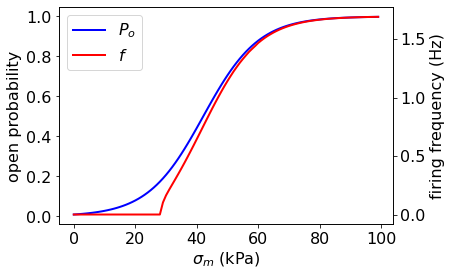

In [4]:
#4) Plot voltage trace
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(6,4))
ax1 = fig.subplots(1, 1)
lns1 = ax1.plot(sigma_m_li/1000, p_o_li, 'b', linewidth=2, label=r'$P_o$')
ax1.set_ylabel('open probability')
ax2 = ax1.twinx()
lns2 = ax2.plot(sigma_m_li/1000, freqs, 'r', linewidth=2, label='$f$')
ax1.set_xlabel(r'$\sigma_m$ (kPa)')
ax2.set_ylabel('firing frequency (Hz)')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.savefig('./output/fscurve.pdf', dpi=300, bbox_inches='tight')
plt.show()